In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [15,8]
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from warnings import filterwarnings
filterwarnings('ignore')

# Online Shoppers Intention

## Problem Statement:

### Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

## Data Set Information:

### The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

## Attribute Information:
#### The dataset consists of 10 numerical and 8 categorical attributes.
#### The 'Revenue' attribute can be used as the class label.

#### "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

#### The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

#### The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

### Citation / Reference:

#### Please use the below link to cite this dataset:
#### Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). https://link.springer.com/article/10.1007/s00521-018-3523-0 Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Expected Approach/Outcomes:
#### Perform required cleaning to bring the uniformity in the data.
#### Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.
#### Perform required missing value treatment
#### Perform Outlier treatment if required
#### Perform appropriate scaling
#### Perform required encoding techniques
#### Build the different cluster models.
#### Analyse the optimum number of cluster using appropriate techniques.
#### Make the appropriate business interpretation using the cluster centroids.
#### Perform the EDA on cluster groups to understand the cluster characteristics.
#### Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
#### Also try different graphs to visualize the clusters and its characteristics. 

In [2]:
shoppers = pd.read_csv('online_shoppers_intention.csv')
print(shoppers.shape)
shoppers.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Checking for Null values - 
shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

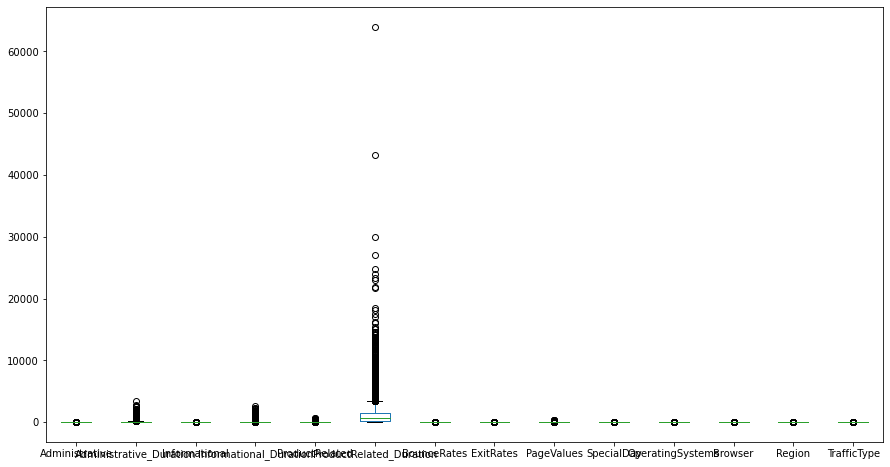

In [6]:
# Checking for Outliers -
shoppers.plot(kind='box')
plt.show()

In [7]:
# Using the IQR Method to remove outliers.

q1 = shoppers['ProductRelated_Duration'].quantile(0.25)
q3 = shoppers['ProductRelated_Duration'].quantile(0.75)

IQR = q3 - q1

UL = q3 + (IQR*1.5)
LL = q1 - (IQR*1.5)

shoppers[((shoppers['ProductRelated_Duration'] <= LL) | (shoppers['ProductRelated_Duration'] >= UL))]
# We are losing almost 90% of data with the IQR Method we will not proceed by cleaning the data.

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
40,1,9.000000,0,0.00,46,4084.393939,0.000000,0.001795,0.000000,0.0,Feb,2,2,8,4,Returning_Visitor,False,False
66,4,44.000000,0,0.00,90,6951.972222,0.002151,0.015013,0.000000,0.0,Feb,4,1,1,3,Returning_Visitor,False,False
109,6,326.250000,4,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
195,0,0.000000,0,0.00,98,3556.612410,0.002062,0.010173,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
251,0,0.000000,0,0.00,18,5188.500000,0.000000,0.050000,0.000000,0.0,Mar,2,5,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,6,369.333333,2,225.50,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12287,8,167.910714,6,547.75,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12308,1,19.000000,0,0.00,45,4018.450000,0.009091,0.021970,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,True,False
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True


In [8]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## Uni-Variate Analysis of the Data

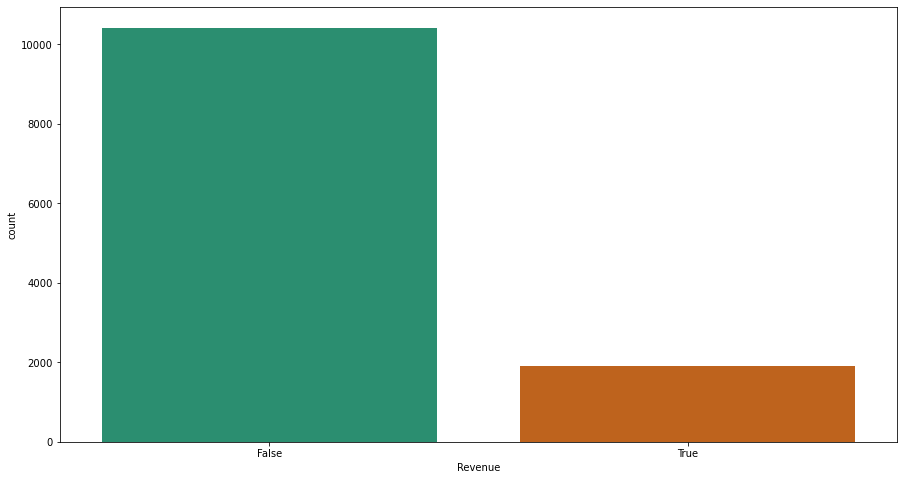

In [9]:
# Checking the Distribution of Revenue
sns.countplot(shoppers['Revenue'],palette='Dark2')
plt.show()

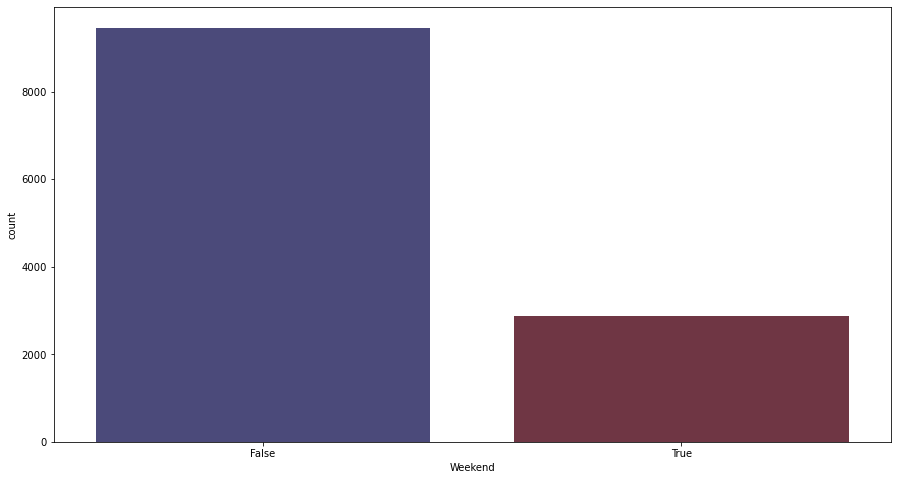

In [10]:
# Checking the Distribution of customers on Weekend
sns.countplot(shoppers['Weekend'], palette = 'icefire')
plt.show()

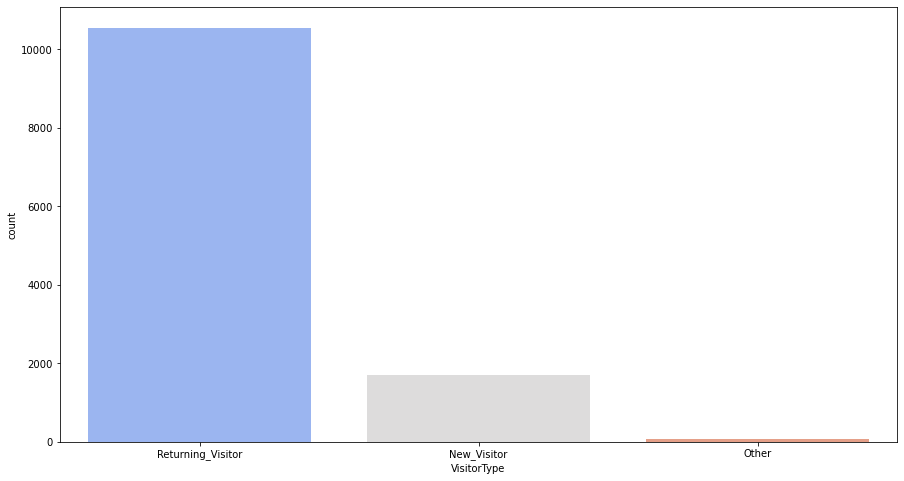

In [11]:
# Checking the Distribution of The Type of Visitors - 
sns.countplot(shoppers['VisitorType'],palette='coolwarm')
plt.show()

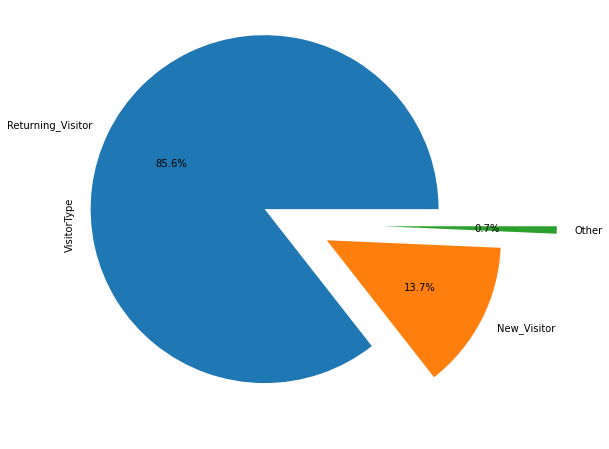

In [12]:
# Checking the Distribution of The Type of Visitors - 
shoppers['VisitorType'].value_counts().plot.pie(autopct="%.1f%%",explode=[0.2,0.2,0.5])
plt.show()

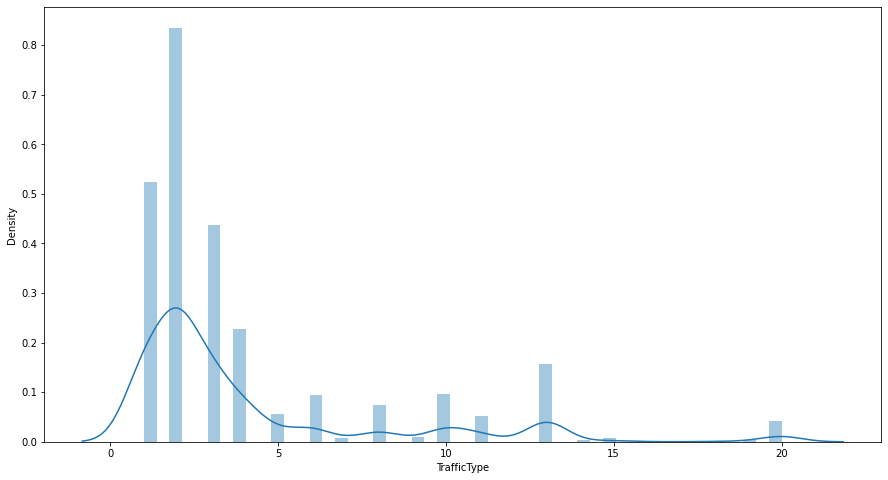

In [13]:
# Checking the Distribution of The Traffic Type - 
sns.distplot(shoppers['TrafficType'])
plt.show()

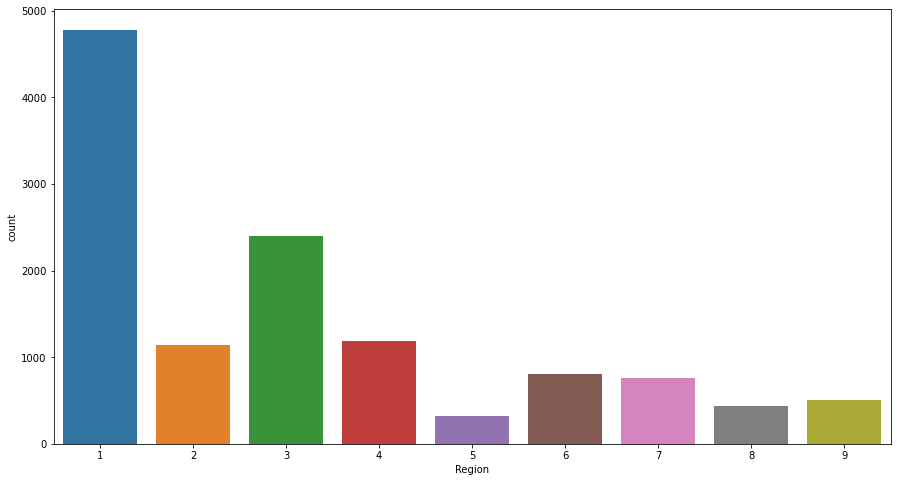

In [14]:
# Checking the Distribution of The Regions - 
sns.countplot(shoppers['Region'])
plt.show()

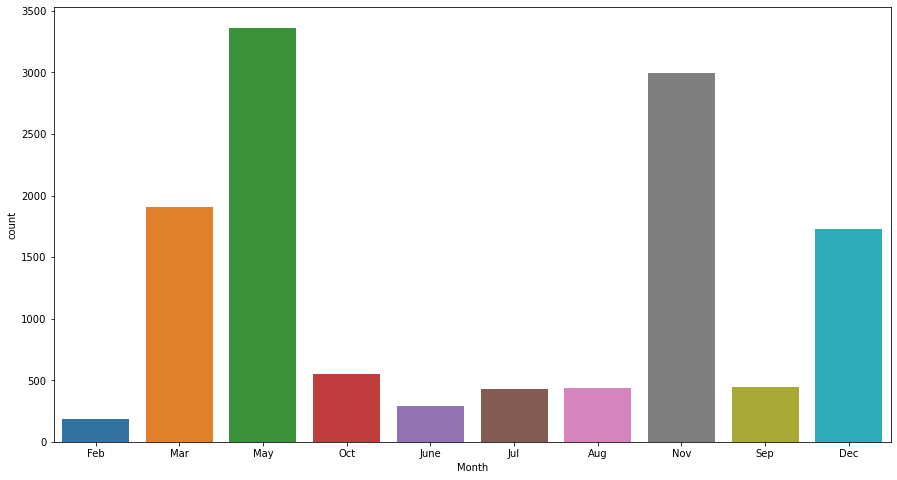

In [15]:
# Checking the Distribution of Customers / Visitor per Month - 
sns.countplot(shoppers['Month'])
plt.show()

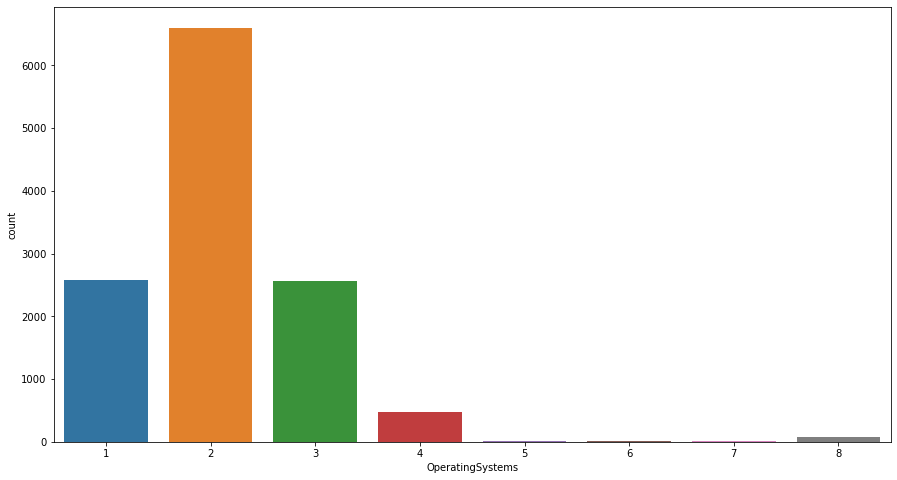

In [16]:
# Checking the Distribution of Customer's  Operating Systems - 
sns.countplot(shoppers['OperatingSystems'])
plt.show()

## Bi-Variate Analysis of the Data

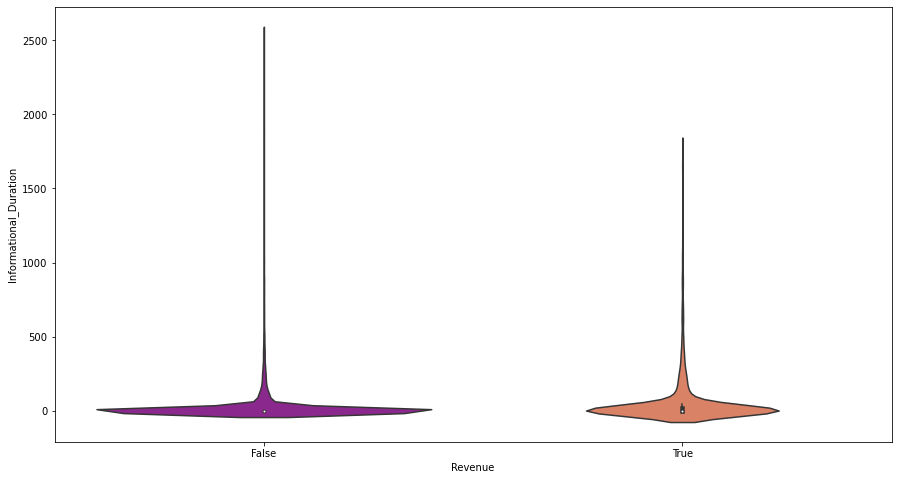

In [17]:
# We will now check how the variable fare in comparison to Revenue -
# Informational_Duration vs Revenue -
sns.violinplot(x='Revenue',y='Informational_Duration',data=shoppers,palette='plasma')
plt.show()

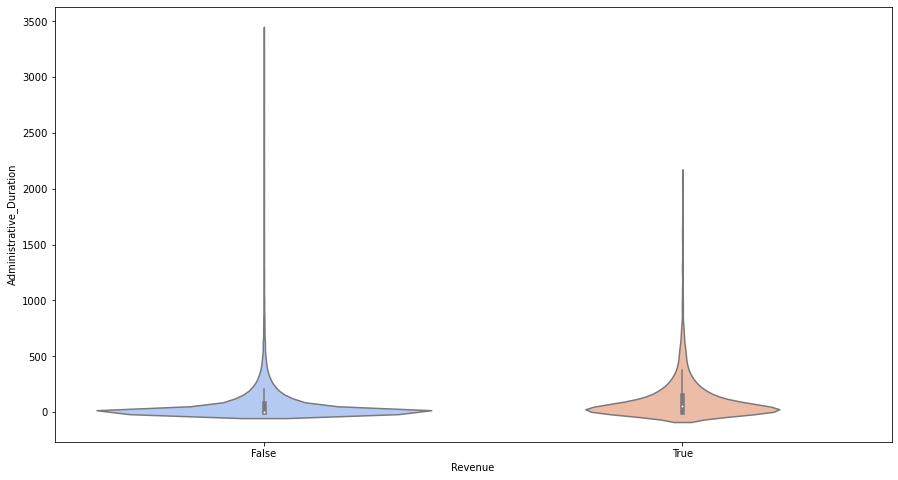

In [18]:
# Administrative_Duration vs Revenue -
sns.violinplot(x='Revenue',y='Administrative_Duration',data=shoppers,palette='coolwarm')
plt.show()

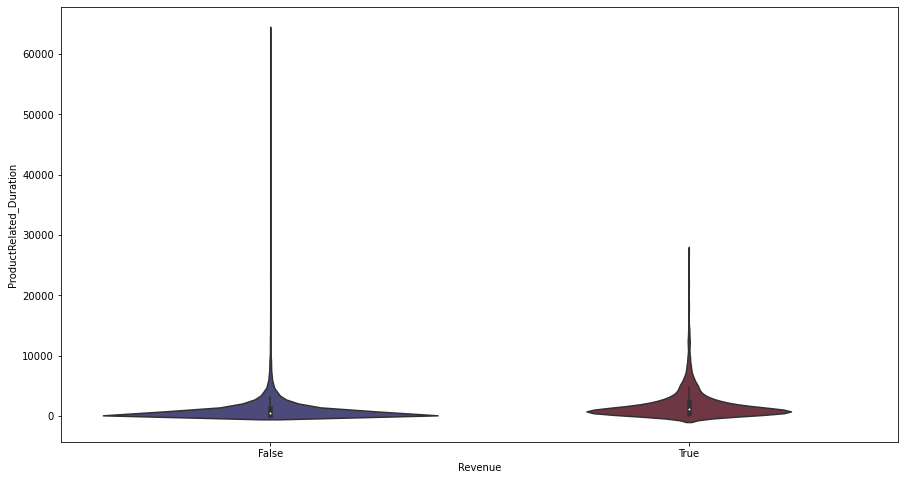

In [19]:
# ProductRelated_Duration vs Revenue -
sns.violinplot(x='Revenue',y='ProductRelated_Duration',data=shoppers,palette='icefire')
plt.show()

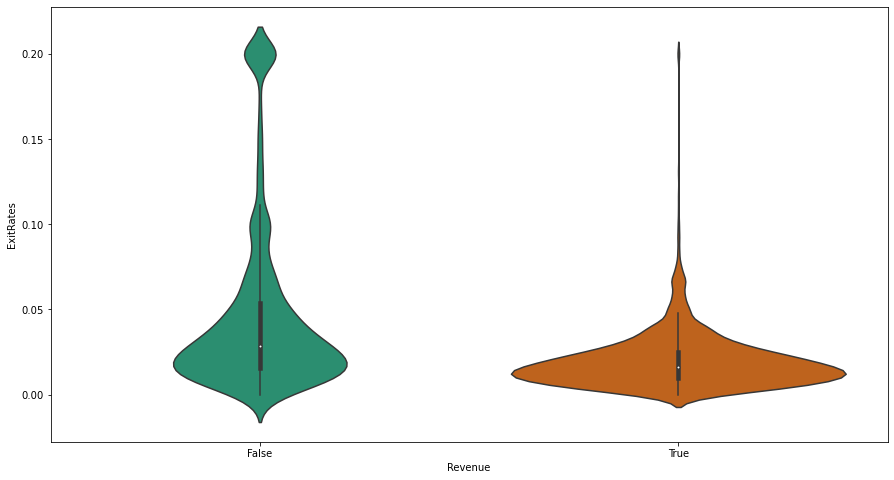

In [20]:
# ExitRates vs Revenue -
sns.violinplot(x='Revenue',y='ExitRates',data=shoppers,palette='Dark2')
plt.show()

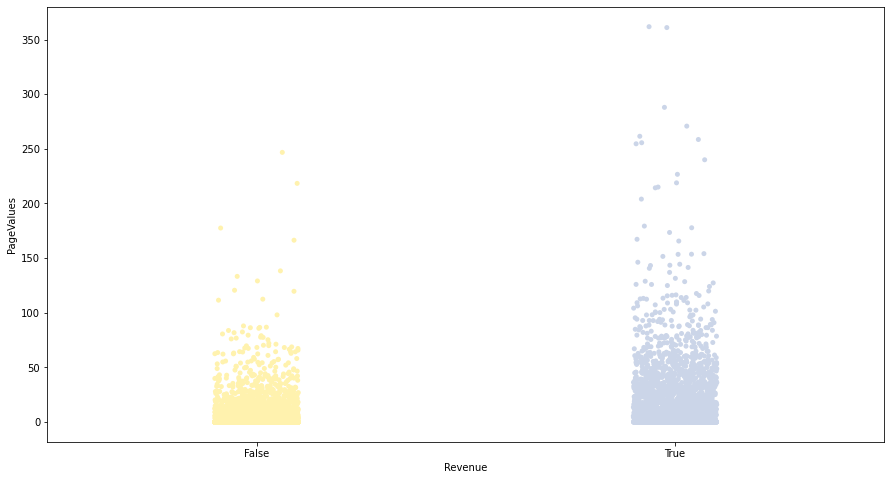

In [21]:
# PageValues vs Revenue -
sns.stripplot(x='Revenue',y='PageValues',data=shoppers,palette='Pastel2_r')
plt.show()

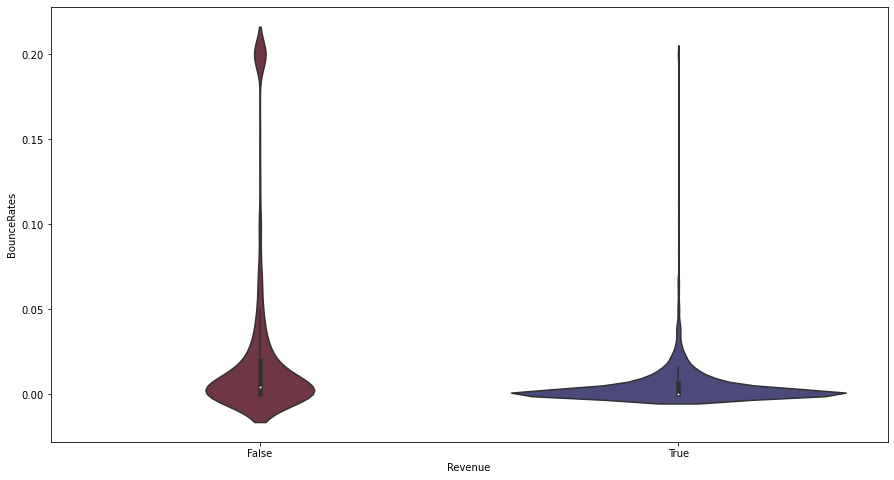

In [22]:
# BounceRates vs Revenue -
sns.violinplot(x='Revenue',y='BounceRates',data=shoppers,palette='icefire_r')
plt.show()

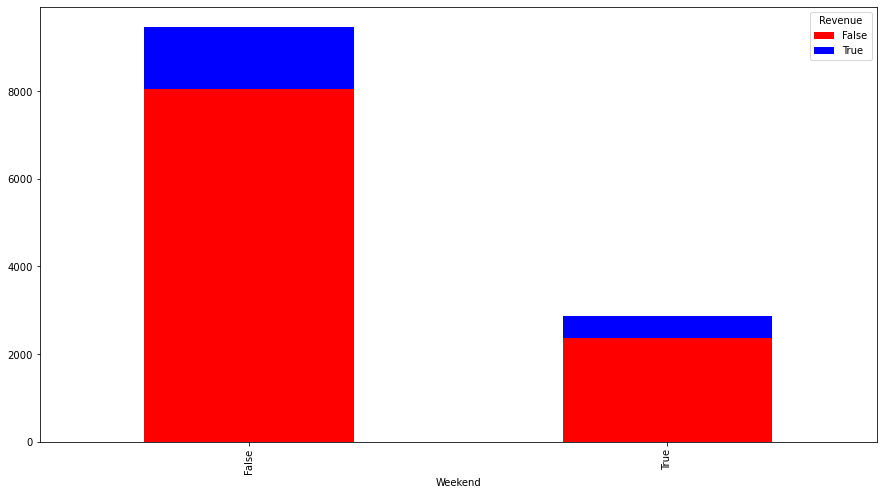

In [23]:
# Weekend vs Revenue -
pd.crosstab(shoppers['Weekend'], shoppers['Revenue']).plot(kind='bar',stacked=True,color=['r','b'])
plt.show()

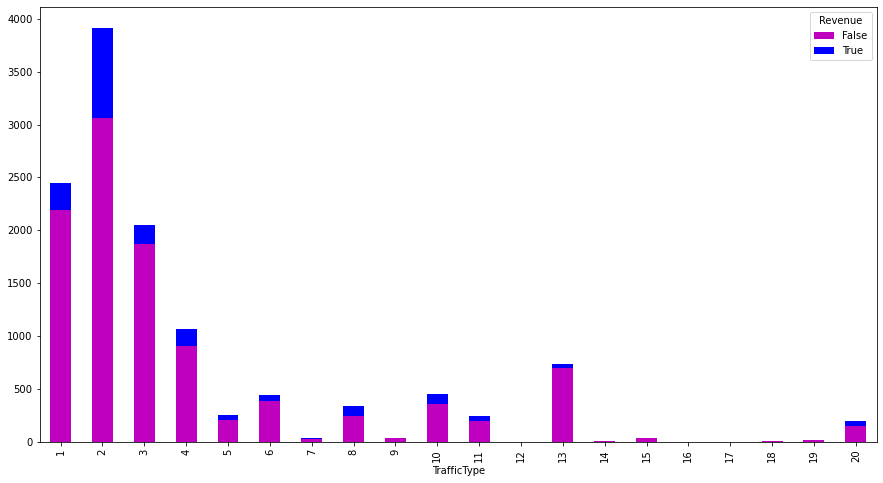

In [24]:
# TrafficType vs Revenue -
pd.crosstab(shoppers['TrafficType'], shoppers['Revenue']).plot(kind='bar',stacked=True,color=['m','b'])
plt.show()

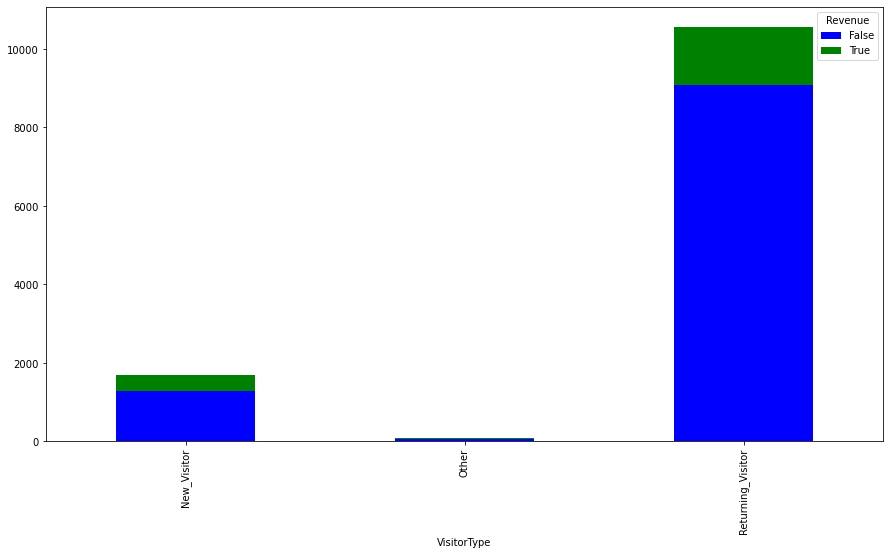

In [25]:
# VisitorType vs Revenue -
pd.crosstab(shoppers['VisitorType'], shoppers['Revenue']).plot(kind='bar',stacked=True,color=['b','green'])
plt.show()

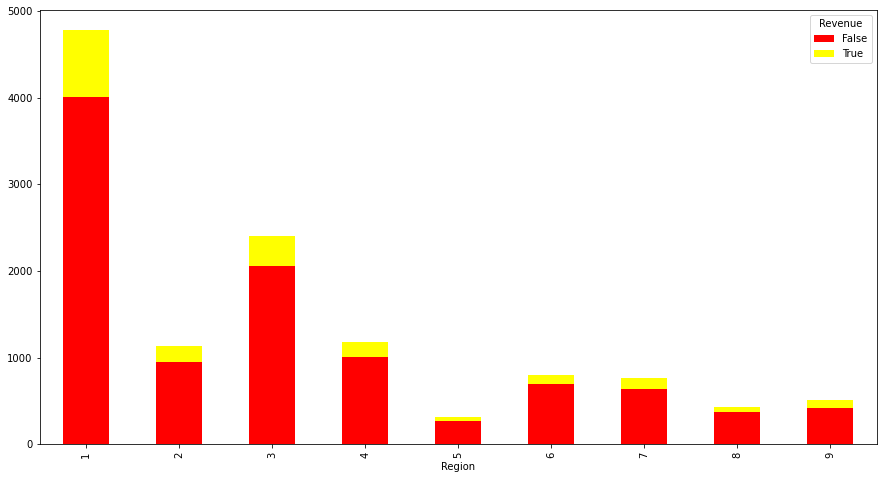

In [26]:
# Region vs Revenue -
pd.crosstab(shoppers['Region'], shoppers['Revenue']).plot(kind='bar',stacked=True,color=['r','yellow'])
plt.show()

## Multi-Variate Analysis of the Data

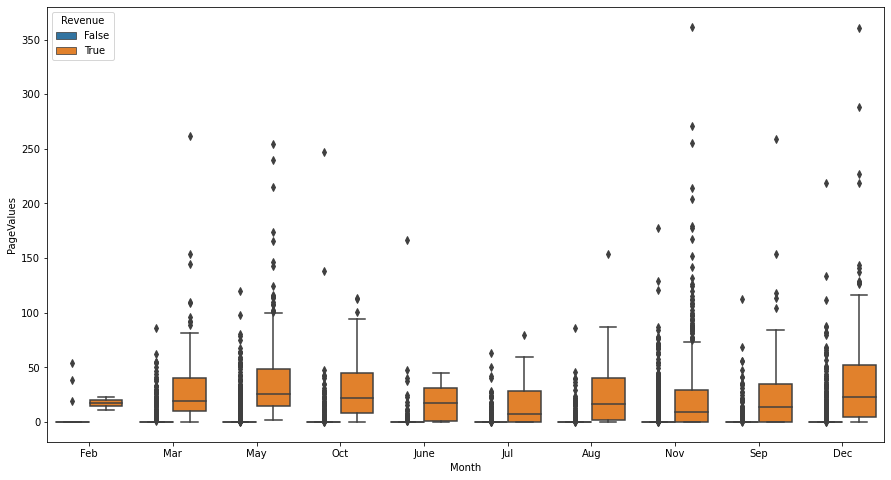

In [27]:
# Month vs Page Values with hue of Revenue -
sns.boxplot(x ='Month', y ='PageValues', hue ='Revenue',data=shoppers)
plt.show()

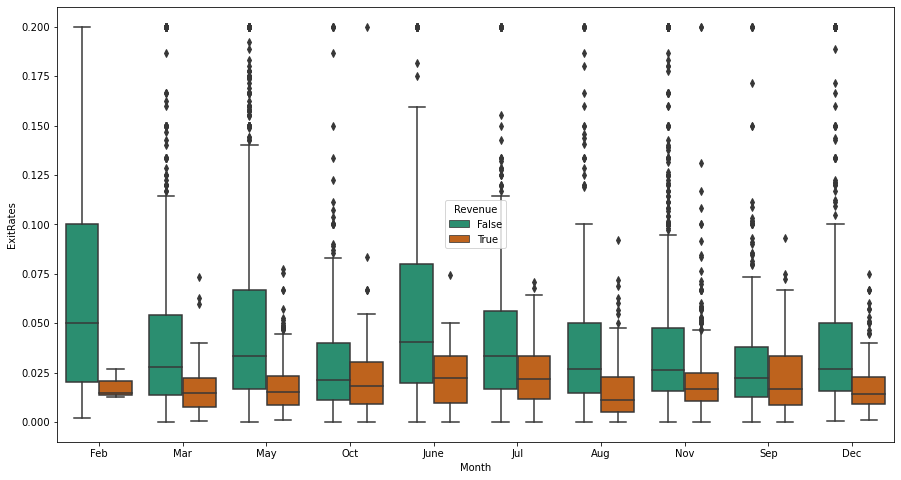

In [28]:
# Month vs ExitRates with hue of Revenue -
sns.boxplot(x ='Month', y ='ExitRates', hue ='Revenue',data=shoppers,palette='Dark2')
plt.show()

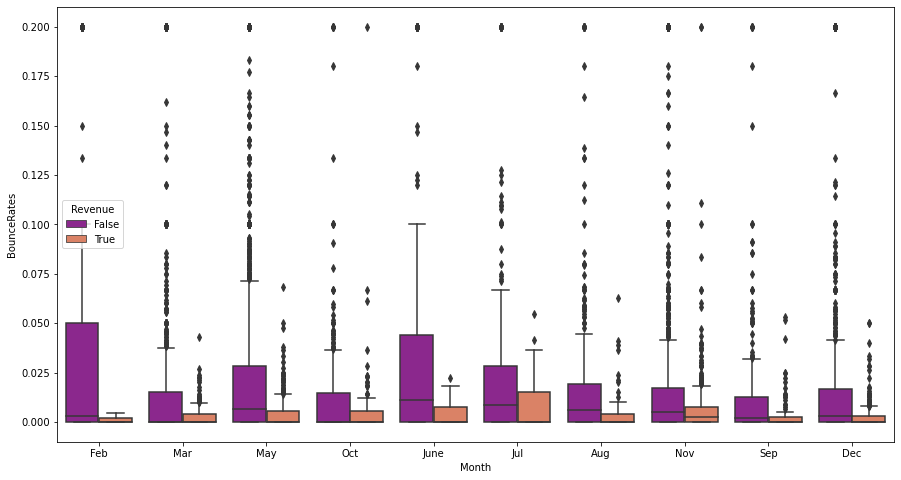

In [31]:
# Month vs BounceRates with hue of Revenue -
sns.boxplot(x ='Month', y ='BounceRates', hue ='Revenue',data=shoppers,palette='plasma')
plt.show()

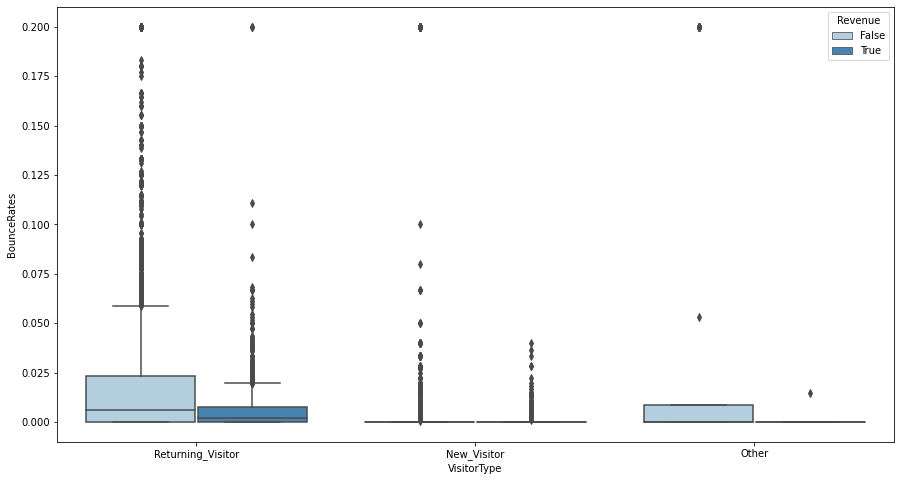

In [33]:
# VisitorType vs BounceRates with hue of Revenue -
sns.boxplot(x ='VisitorType', y ='BounceRates', hue ='Revenue',data=shoppers,palette='Blues')
plt.show()

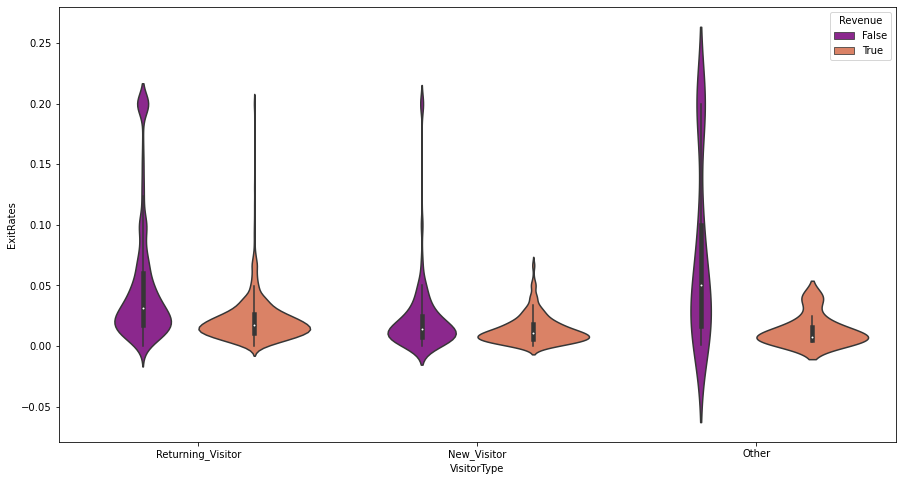

In [35]:
# VisitorType vs ExitRates with hue of Revenue -
sns.violinplot(x ='VisitorType', y ='ExitRates', hue ='Revenue',data=shoppers,palette='plasma')
plt.show()

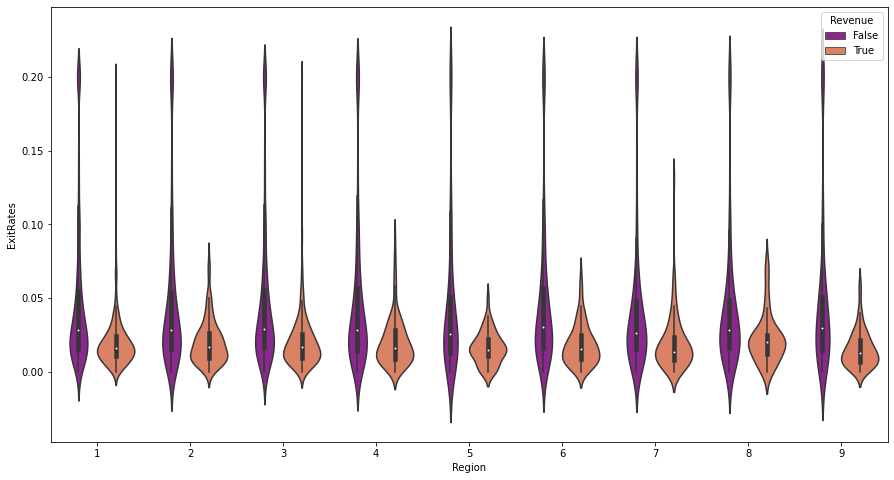

In [36]:
# Region vs ExitRates with hue of Revenue -
sns.violinplot(x ='Region', y ='ExitRates', hue ='Revenue',data=shoppers,palette='plasma')
plt.show()

## Clustering -

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
shoppers['Revenue'] = le.fit_transform(shoppers['Revenue'])
shoppers['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [50]:
data = pd.get_dummies(shoppers)
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [51]:
x = data.drop('Revenue',axis=1)

In [52]:
y = data['Revenue']

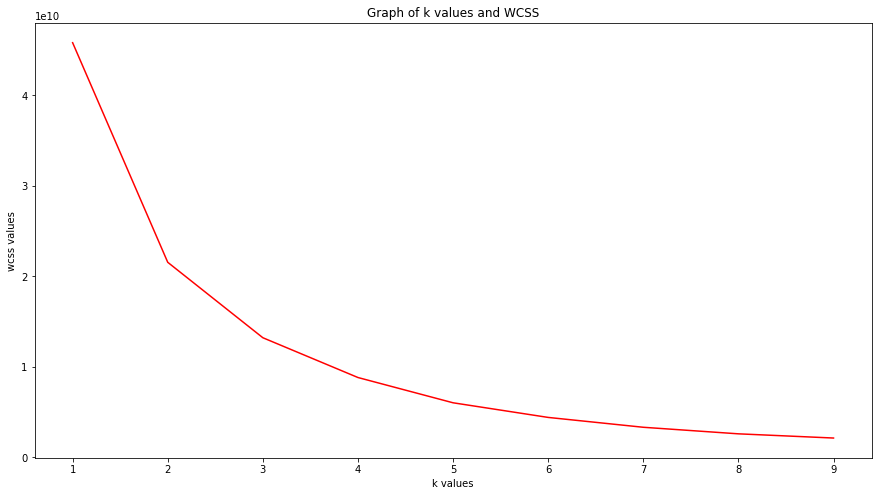

In [39]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(x)

In [41]:
df_k = x.copy(deep=True)

df_k['label'] = clusters

In [43]:
print('Origional Data Classes :')
print(shoppers.Revenue.value_counts())
print('-' * 50)

print('Predicted Data Classes :')
print(df_k.label.value_counts())

Origional Data Classes :
0    10422
1     1908
Name: Revenue, dtype: int64
--------------------------------------------------
Predicted Data Classes :
0    10146
2     1977
1      207
Name: label, dtype: int64


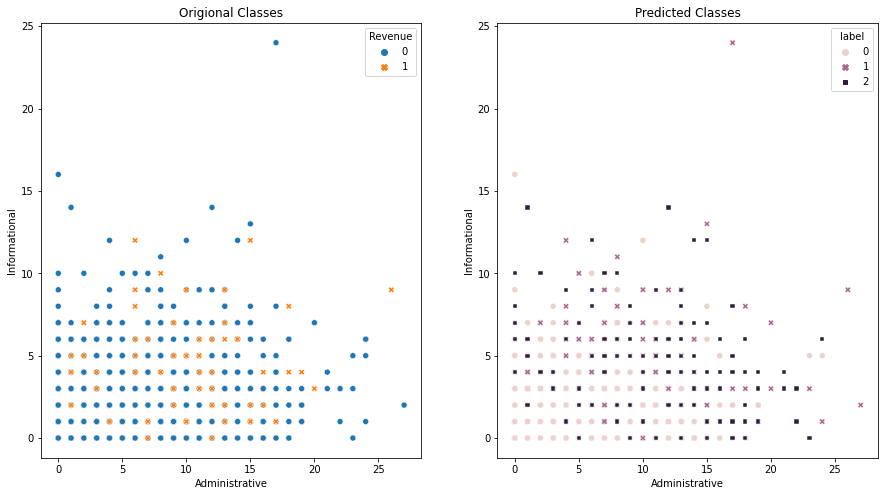

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Origional Classes')
sns.scatterplot(x='Administrative', y='Informational', hue='Revenue', style='Revenue', data=shoppers, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')

sns.scatterplot(x='Administrative', y='Informational', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

hie_cal = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_cal.fit_predict(x)

df_h = x.copy(deep=True)
df_h['label'] = cluster2

In [46]:
print('Origional Data Classes :')
print(shoppers.Revenue.value_counts())
print('-' * 50)

print('K-Means Predicted Data Classes :')
print(df_k.label.value_counts())
print('-' * 50)

print('Hierarchical Predicted Data Classes :')
print(df_h.label.value_counts())

Origional Data Classes :
0    10422
1     1908
Name: Revenue, dtype: int64
--------------------------------------------------
K-Means Predicted Data Classes :
0    10146
2     1977
1      207
Name: label, dtype: int64
--------------------------------------------------
Hierarchical Predicted Data Classes :
2    9500
1    2507
0     323
Name: label, dtype: int64


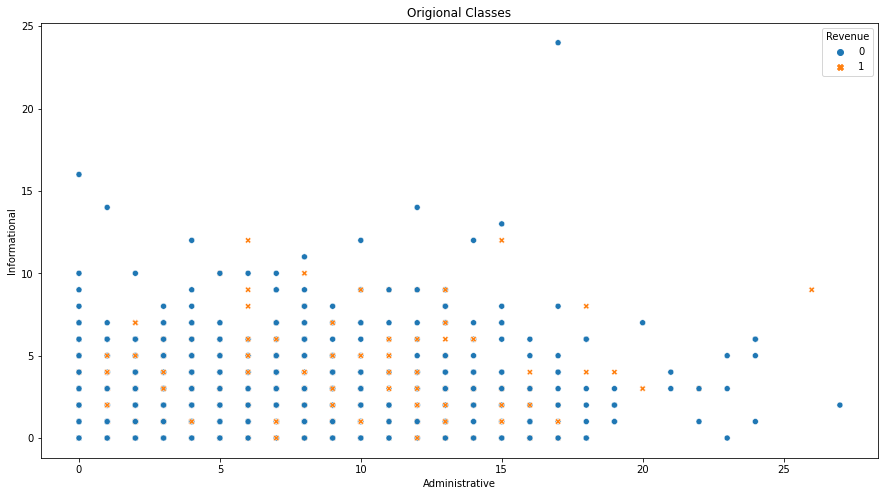

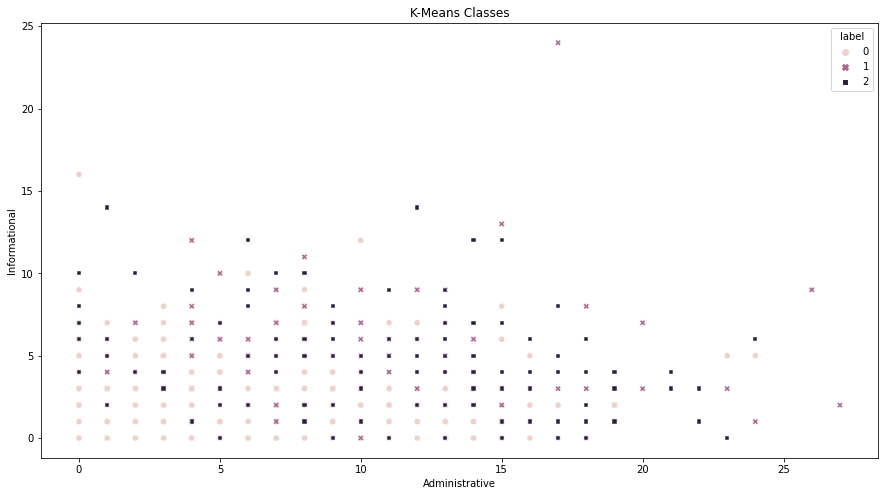

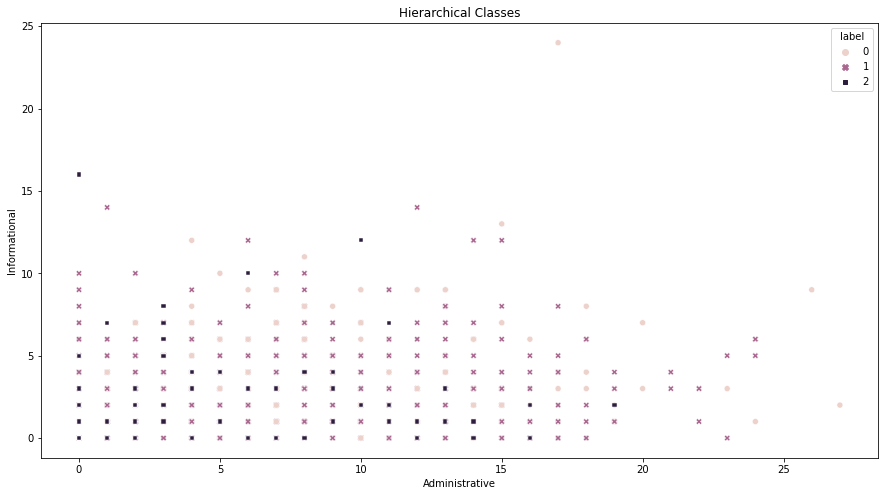

In [85]:
plt.title('Origional Classes')
sns.scatterplot(x='Administrative', y='Informational', hue='Revenue', style='Revenue', data=shoppers)
plt.show()

plt.title('K-Means Classes')
sns.scatterplot(x='Administrative', y='Informational', hue='label', style='label', data=df_k)
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='Administrative', y='Informational', hue='label', style='label', data=df_h)
plt.show()

## Scaling the Data -

In [54]:
# Splitting the Data into Train and Validation Data -

x = data.drop('Revenue',axis=1)
y = data['Revenue']

xtrain, xvalidate, ytrain, yvalidate = train_test_split(x, y, test_size=0.2, random_state=7)

In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

xtrain = ss.fit_transform(xtrain)

xvalidate = ss.transform(xvalidate)

In [57]:
# Creating a Decision Tree Model -

from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(max_depth = 3)

Dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [58]:
# Checking the Accuracy of the Model -
predictvalues_train = Dtree.predict(xtrain)
accuracy_train = metrics.accuracy_score(ytrain, predictvalues_train)

predictvalues_validate =  Dtree.predict(xvalidate)
accuracy_validate = metrics.accuracy_score(yvalidate, predictvalues_validate)

print('Train Accuracy :', accuracy_train)
print('Validation Accuracy :', accuracy_validate)

Train Accuracy : 0.8989253852392538
Validation Accuracy : 0.8990267639902676


In [59]:
print('Classification Report :')
print(metrics.classification_report(yvalidate, predictvalues_validate))

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2077
           1       0.71      0.61      0.65       389

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.80      2466
weighted avg       0.89      0.90      0.90      2466



In [60]:
# Creating a Random Forrest Model -

from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(n_estimators=100,random_state=0,min_impurity_split=5,criterion='gini', max_depth=5)

rfclassifier.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5, min_impurity_split=5, random_state=0)

In [61]:
# Checking the Accuracy of the Model -
predictvalues_train = rfclassifier.predict(xtrain)
accuracy_train = metrics.accuracy_score(ytrain, predictvalues_train)

predictvalues_validate =  rfclassifier.predict(xvalidate)
accuracy_validate = metrics.accuracy_score(yvalidate, predictvalues_validate)

print('Train Accuracy :', accuracy_train)
print('Validation Accuracy :', accuracy_validate)

Train Accuracy : 0.8460056772100568
Validation Accuracy : 0.8422546634225466


In [62]:
print('Classification Report :')
print(metrics.classification_report(yvalidate, predictvalues_validate))

Classification Report :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2077
           1       0.00      0.00      0.00       389

    accuracy                           0.84      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.71      0.84      0.77      2466



## Principal Component Analysis -

In [63]:
x = data.drop('Revenue',axis=1)
y = data['Revenue']

x_std = StandardScaler().fit_transform(x)

In [64]:
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix :\n',cov_matrix)

Covariance Matrix :
 [[ 1.00008111e+00  6.01632136e-01  3.76880995e-01  2.55868892e-01
   4.31154308e-01  3.73969343e-01 -2.23580763e-01 -3.16508667e-01
   9.89976144e-02 -9.47852849e-02 -6.34757808e-03 -2.50366028e-02
  -5.48725030e-03 -3.35634347e-02  2.64188929e-02  4.71627025e-02
  -1.44441899e-02 -6.56539636e-02  6.22150216e-03 -1.90254189e-03
  -5.50400832e-02 -6.45922192e-02  5.15785947e-02  9.12733013e-02
   5.96113546e-02  2.84509828e-02 -2.11861127e-02 -2.28856751e-02]
 [ 6.01632136e-01  1.00008111e+00  3.02734262e-01  2.38050096e-01
   2.89110069e-01  3.55450782e-01 -1.44182103e-01 -2.05814449e-01
   6.76139646e-02 -7.33096706e-02 -7.34401314e-03 -1.53927751e-02
  -5.56101385e-03 -1.43775967e-02  1.49913578e-02  2.79527605e-02
  -4.99045906e-03 -4.45275561e-02 -2.09594281e-03 -1.89758678e-02
  -2.32000174e-02 -3.93210138e-02  3.24342104e-02  5.51052728e-02
   3.13158987e-02  2.50453362e-02 -8.54245289e-03 -2.25263543e-02]
 [ 3.76880995e-01  3.02734262e-01  1.00008111e+00  6.

In [66]:
eig_vals , eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Vectors :\n',eig_vecs,'\n')

print('Eigen Values :\n',eig_vals)

Eigen Vectors :
 [[ 3.73813932e-01  6.76737120e-04  3.03893896e-02 -4.41361364e-02
  -1.62058416e-01 -3.23614724e-02 -4.63748393e-01 -5.73021818e-01
   1.17958341e-01 -5.57371882e-02 -1.23873134e-01 -2.47202612e-03
   2.42662286e-02 -1.40427392e-01 -1.57244257e-02  2.76394657e-01
   2.40288251e-01 -2.15782949e-01  1.73152541e-02  1.70070155e-01
  -1.02838730e-01  5.51005257e-02 -6.63312411e-02  7.12335128e-02
  -2.68323338e-02 -3.55998494e-03  1.43285128e-16 -1.69551528e-17]
 [ 3.18804124e-01  1.56659485e-02  4.74252129e-02 -3.66478622e-02
   1.43816042e-01 -1.76416025e-02  3.11552390e-01  5.53035635e-01
   1.76301122e-01 -5.91281110e-02 -1.54724141e-01 -1.50439740e-02
  -1.23568446e-02 -1.87421364e-01 -5.29952329e-02  2.71149846e-01
   3.32095067e-01 -2.86109179e-01  1.00478145e-02  2.35143317e-01
  -1.70339056e-01  6.89050477e-02 -8.11788756e-02  9.72435830e-02
  -5.28502044e-02 -1.10774949e-02 -1.00871296e-16  1.63130547e-16]
 [ 3.35818079e-01  1.30373038e-01  6.80830593e-02  1.1718

In [67]:
eigien_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained :',cum_var_exp)

Cumulative Variance Explained : [ 12.4535551   20.95375606  27.43793261  33.35421891  38.49269044
  43.22706341  47.30888801  51.33198318  55.14380076  58.89559728
  62.60018203  66.28809472  69.92071412  73.41997657  76.84265196
  80.21522592  83.53099819  86.73054427  89.63608952  92.31559279
  94.54260467  96.55216967  98.04586586  99.29411773  99.72936668
 100.         100.         100.        ]


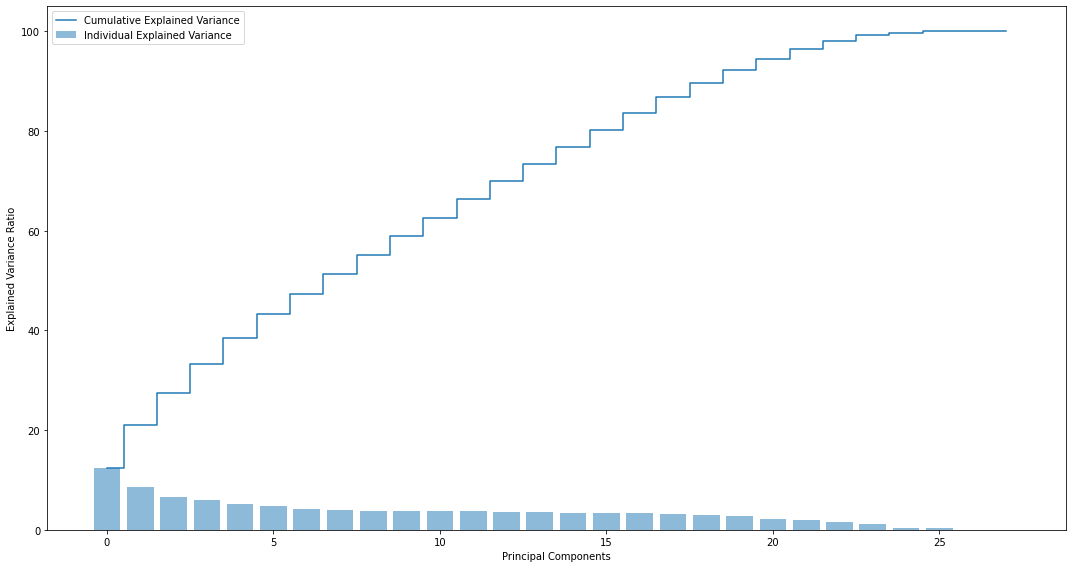

In [69]:
plt.bar(range(28),var_exp,alpha=0.5,align='center',label = 'Individual Explained Variance')
plt.step(range(28),cum_var_exp,where='mid',label='Cumulative Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.legend(loc='best')
plt.tight_layout()

In [70]:
x = data.drop('Revenue',axis=1)
y = data['Revenue']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [72]:
from sklearn import tree

model =tree.DecisionTreeClassifier()

model.fit(xtrain,ytrain)

ypred_DT = model.predict(xtest)

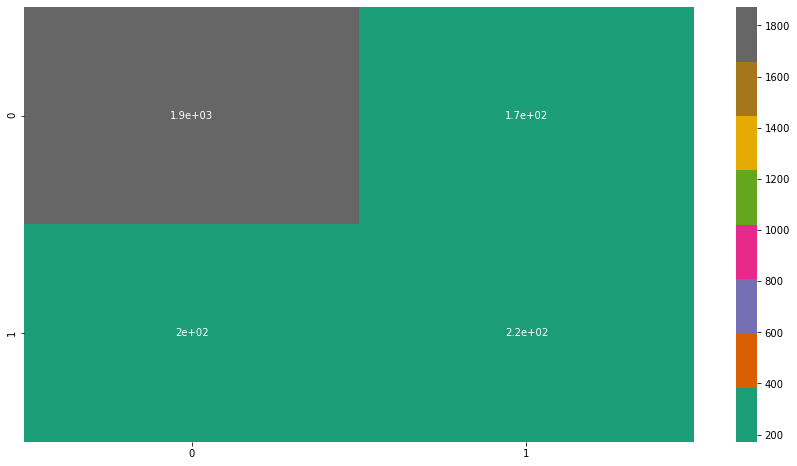

In [75]:
cm_DT= metrics.confusion_matrix(ytest, ypred_DT)
sns.heatmap(cm_DT, annot=True,cmap='Dark2')
plt.show()

In [76]:
classification = metrics.classification_report(ytest,ypred_DT)
print('Classification Report :',classification)

Classification Report :               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2044
           1       0.56      0.52      0.54       422

    accuracy                           0.85      2466
   macro avg       0.73      0.72      0.73      2466
weighted avg       0.84      0.85      0.85      2466



In [77]:
x = data.drop('Revenue',axis=1)
y = data['Revenue']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [78]:
from sklearn.decomposition import PCA
pca = PCA()
xtrain_2 = pca.fit_transform(xtrain)
xtest_2 = pca.transform(xtest)

In [79]:
explained_variance = pca.explained_variance_ratio_  
print('The Explained Variance :',explained_variance)

The Explained Variance : [1.24784694e-01 8.49571630e-02 6.44259232e-02 5.90621976e-02
 5.16723112e-02 4.72463446e-02 4.09108226e-02 4.00582548e-02
 3.82029525e-02 3.74835896e-02 3.70604635e-02 3.69997506e-02
 3.63822219e-02 3.49422324e-02 3.41456906e-02 3.39347172e-02
 3.32712832e-02 3.16888042e-02 2.90808002e-02 2.65734503e-02
 2.25737100e-02 2.00131991e-02 1.52898986e-02 1.21955196e-02
 4.37222771e-03 2.67177769e-03 2.46094417e-32 2.75428910e-33]


In [80]:
model2 = tree.DecisionTreeClassifier()
model2.fit(xtrain_2,ytrain)
ypred_DT_2 = model2.predict(xtest_2)

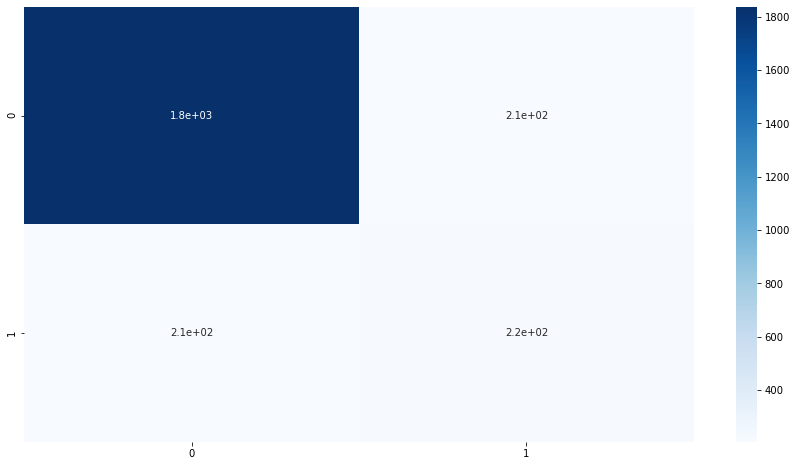

In [82]:
cm_PCA = metrics.confusion_matrix(ytest, ypred_DT_2)
sns.heatmap(cm_PCA, annot=True,cmap='Blues')
plt.show()

In [83]:
classification_pca = metrics.classification_report(ytest,ypred_DT_2)
print('Classification Report :',classification_pca)

Classification Report :               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2044
           1       0.51      0.51      0.51       422

    accuracy                           0.83      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.83      0.83      0.83      2466



### We can see that the PCA is not having a lot of effect on the clustering process.

------